<a href="https://colab.research.google.com/github/DulithMH/Credit-Risk-Prediction-ML/blob/main/Predicting_Credit_Risk_Model_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kabure_german_credit_data_with_risk_path = kagglehub.dataset_download('kabure/german-credit-data-with-risk')

print('Data source import complete.')


100%|██████████| 11.2k/11.2k [00:00<00:00, 9.75MB/s]

Extracting files...
Data source import complete.


In [ ]:
import os
import pandas as pd

# List files in the downloaded dataset directory
print(os.listdir(kabure_german_credit_data_with_risk_path))

# Assuming the main data file is named 'german_credit_data.csv' or similar
# Adjust filename if necessary after checking the print output
data_file_path = os.path.join(kabure_german_credit_data_with_risk_path, 'german_credit_data.csv')

# Load the dataset into a pandas DataFrame
df = pd.read_csv(data_file_path)

# Display the first 5 rows of the DataFrame
display(df.head())

['german_credit_data.csv']


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
original_df = df.copy()

In [ ]:
df = df.rename(columns={"Credit amount": "Credit_amount"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit_amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.describe()

,Unnamed: 0,Age,Job,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit_amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
# Check missing values
df.isnull().sum().sort_values(ascending=False)

,0
Checking account,394
Saving accounts,183
Unnamed: 0,0
Sex,0
Age,0
Housing,0
Job,0
Credit_amount,0
Duration,0
Purpose,0


In [ ]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


now im going to see wether distribution of gender vs credict amount

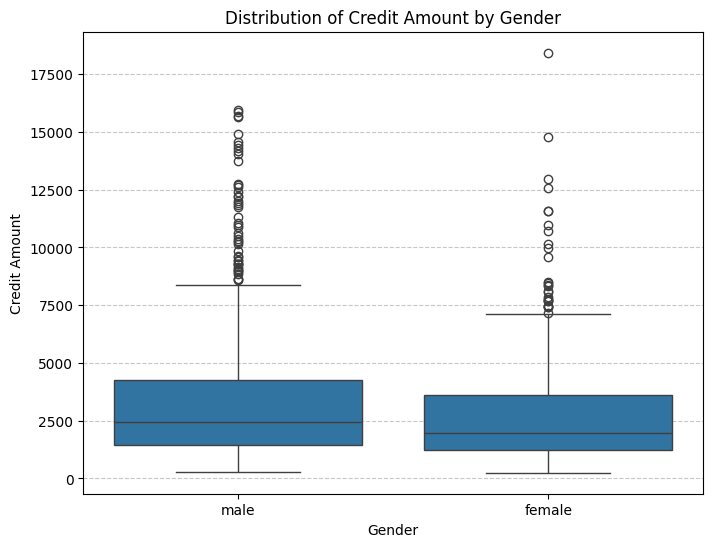

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Credit_amount', data=df)
plt.title('Distribution of Credit Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Credit Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

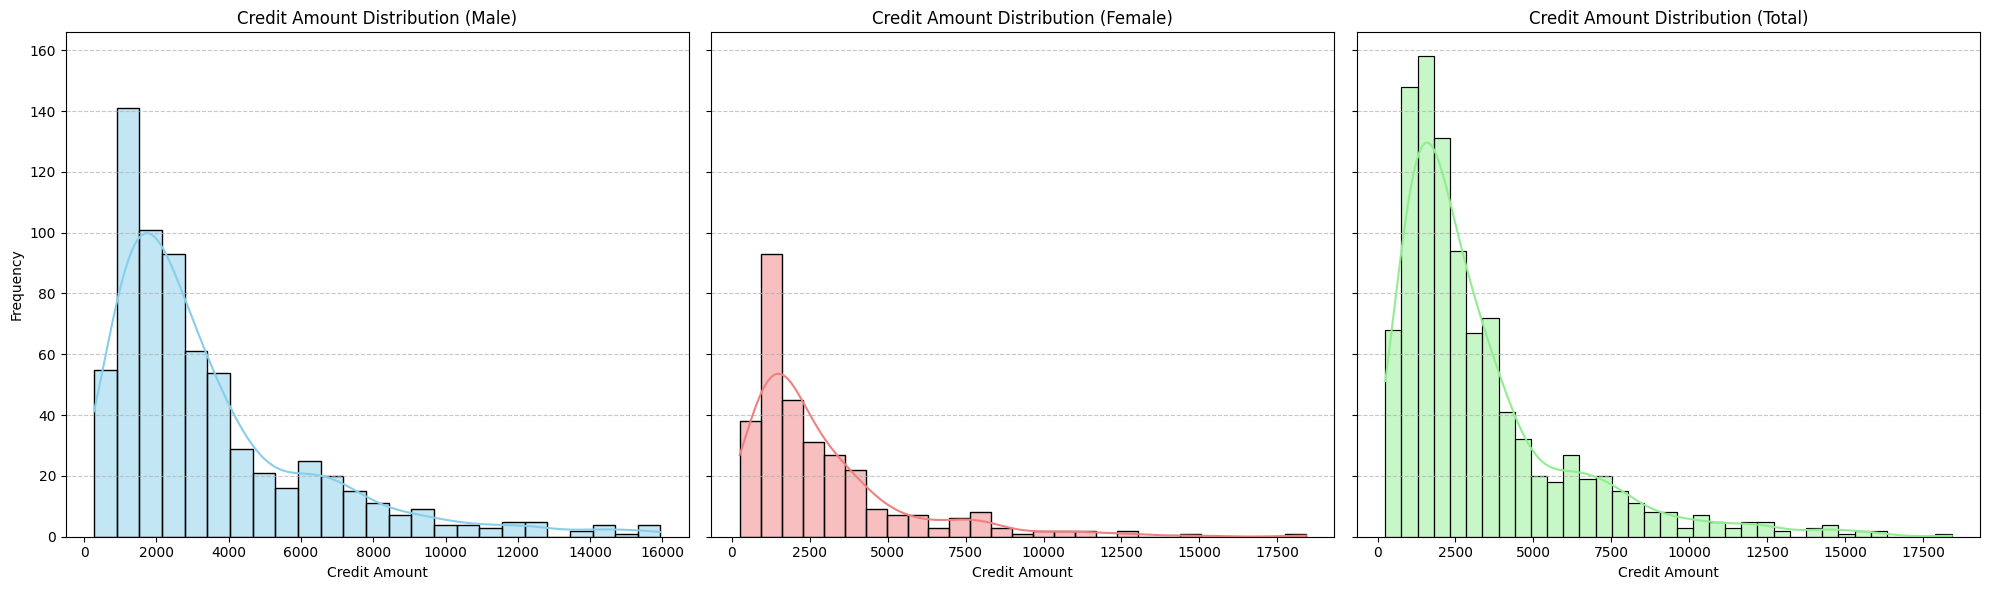

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Histogram for Male Credit Amount
sns.histplot(df[df['Sex'] == 'male']['Credit_amount'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Credit Amount Distribution (Male)')
axes[0].set_xlabel('Credit Amount')
axes[0].set_ylabel('Frequency')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for Female Credit Amount
sns.histplot(df[df['Sex'] == 'female']['Credit_amount'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Credit Amount Distribution (Female)')
axes[1].set_xlabel('Credit Amount')
axes[1].set_ylabel('Frequency')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for Total Credit Amount
sns.histplot(df['Credit_amount'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Credit Amount Distribution (Total)')
axes[2].set_xlabel('Credit Amount')
axes[2].set_ylabel('Frequency')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Now i need to analyse credict amout with purpose of loan


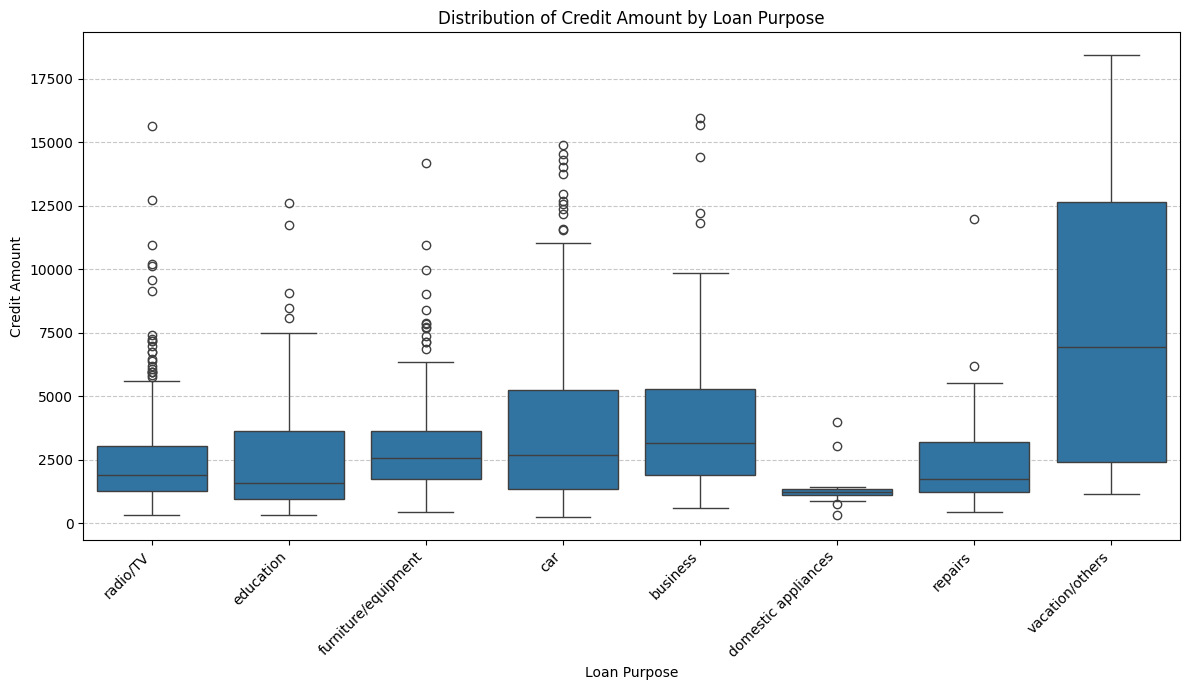

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.boxplot(x='Purpose', y='Credit_amount', data=df)
plt.title('Distribution of Credit Amount by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Credit Amount')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

: See if the data is imbalanced (e.g., are there many more "Good" risks than "Bad"?).

/tmp/ipython-input-3627437562.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




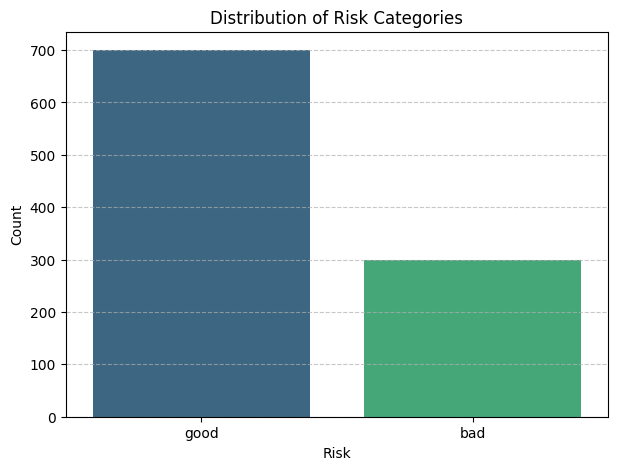

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.countplot(x='Risk', data=df, palette='viridis')
plt.title('Distribution of Risk Categories')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
risk_counts = df['Risk'].value_counts()
total_count = risk_counts.sum()

good_risk_count = risk_counts.get('good', 0)
bad_risk_count = risk_counts.get('bad', 0)

# Calculate percentages
good_risk_percentage = (good_risk_count / total_count) * 100
bad_risk_percentage = (bad_risk_count / total_count) * 100

print(f"Risk Distribution:")
print(f"  Good Risk: {good_risk_count} ({good_risk_percentage:.2f}%)")
print(f"  Bad Risk: {bad_risk_count} ({bad_risk_percentage:.2f}%)")

# Calculate ratio (Good:Bad)
if bad_risk_count > 0:
    ratio = good_risk_count / bad_risk_count
    print(f"Ratio of Good Risk to Bad Risk: {good_risk_count}:{bad_risk_count} (approximately {ratio:.2f}:1)")
else:
    print("Ratio cannot be calculated as there are no 'Bad' risk entries.")

Risk Distribution:
  Good Risk: 700 (70.00%)
  Bad Risk: 300 (30.00%)
Ratio of Good Risk to Bad Risk: 700:300 (approximately 2.33:1)


# Analyze Age, Credit_amount, and Duration to see how they influence the likelihood of default.

Age vs. Risk: Use a KDE Plot (Kernel Density Estimate) or Box Plot to see if younger people are riskier than older ones.

# Task
Create boxplots to visualize the distribution of 'Age', 'Credit_amount', and 'Duration' for 'Good' and 'Bad' risk categories in the DataFrame `df`.

## Analyze Age vs. Risk

### Subtask:
Create a boxplot to visualize the distribution of 'Age' for 'Good' and 'Bad' risk categories.


**Reasoning**:
To visualize the distribution of 'Age' for 'Good' and 'Bad' risk categories, I will create a boxplot as instructed. This requires using the `seaborn` and `matplotlib.pyplot` libraries.



/tmp/ipython-input-1880613884.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




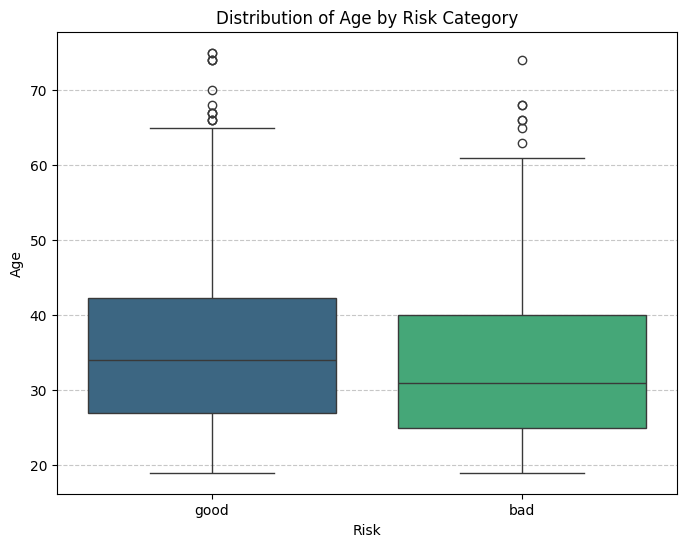

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk', y='Age', data=df, palette='viridis')
plt.title('Distribution of Age by Risk Category')
plt.xlabel('Risk')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Reasoning**:
The previous code generated a FutureWarning about the 'palette' argument. To address this, I will explicitly set the 'hue' argument to 'Risk' and add `legend=False` in the `sns.boxplot` function to ensure proper color mapping without a redundant legend.



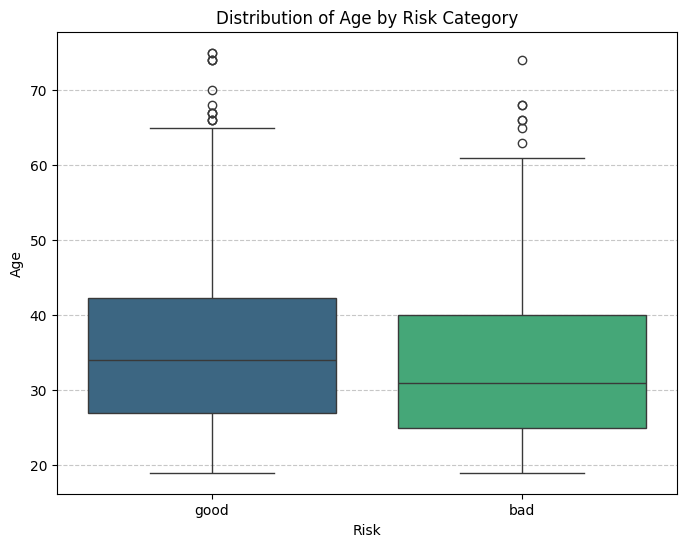

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk', y='Age', data=df, hue='Risk', palette='viridis', legend=False)
plt.title('Distribution of Age by Risk Category')
plt.xlabel('Risk')
plt.ylabel('Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Reasoning**:
To analyze the relationship between 'Credit_amount' and 'Risk' categories, I will generate a boxplot. This visualization will help in understanding the distribution of credit amounts for both 'Good' and 'Bad' risk groups, identifying potential differences in central tendency and spread.



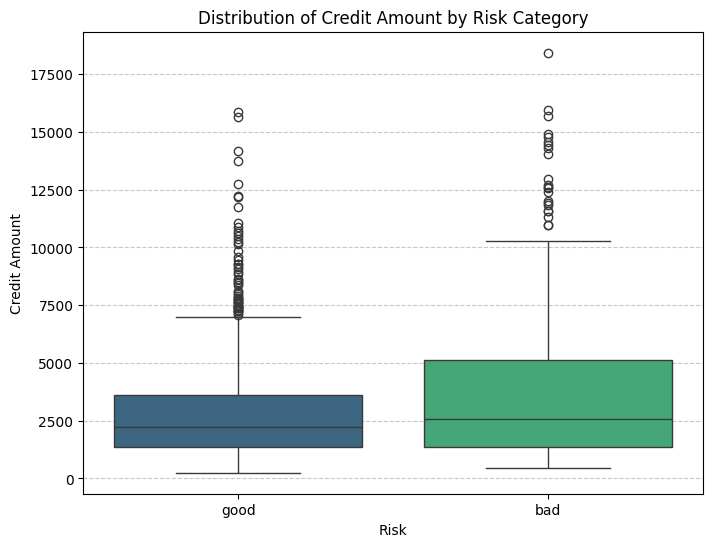

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk', y='Credit_amount', data=df, hue='Risk', palette='viridis', legend=False)
plt.title('Distribution of Credit Amount by Risk Category')
plt.xlabel('Risk')
plt.ylabel('Credit Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Reasoning**:
I have already created boxplots for 'Age' vs 'Risk' and 'Credit_amount' vs 'Risk'. To complete the subtask, I now need to generate a boxplot to visualize the distribution of 'Duration' for 'Good' and 'Bad' risk categories. This will provide insight into how loan duration might relate to risk assessment.



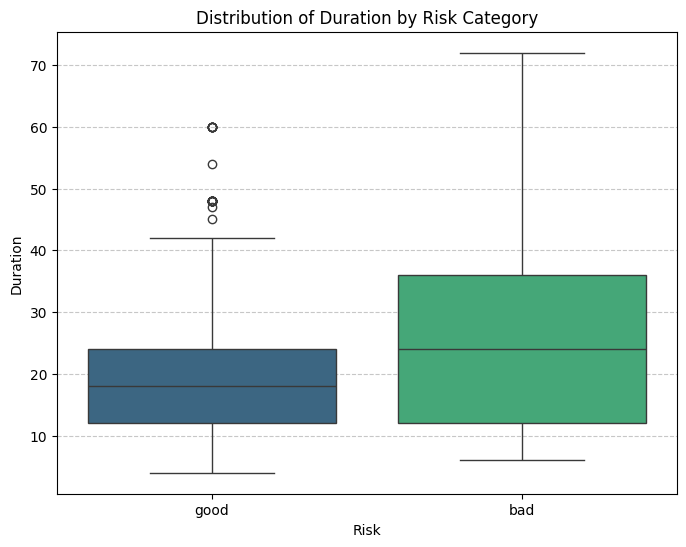

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk', y='Duration', data=df, hue='Risk', palette='viridis', legend=False)
plt.title('Distribution of Duration by Risk Category')
plt.xlabel('Risk')
plt.ylabel('Duration')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Summary:

### Data Analysis Key Findings
*   Boxplots were successfully generated to visualize the distribution of 'Age' for 'Good' and 'Bad' risk categories, allowing for visual comparison of their age profiles.
*   A `FutureWarning` related to Seaborn's `palette` argument without `hue` was encountered during the first plot generation but was successfully resolved by explicitly setting `hue='Risk'` and `legend=False`.
*   The distribution of 'Credit\_amount' for 'Good' and 'Bad' risk categories was successfully visualized using a boxplot.
*   The distribution of 'Duration' for 'Good' and 'Bad' risk categories was successfully visualized through a boxplot, completing all requested visualizations.

### Insights or Next Steps
*   The generated boxplots provide a clear visual tool to identify potential differences in central tendency, spread, and presence of outliers for 'Age', 'Credit\_amount', and 'Duration' between 'Good' and 'Bad' risk groups.
*   The next step could involve performing statistical tests (e.g., t-tests or Mann-Whitney U tests) to formally assess if the observed differences in distributions of 'Age', 'Credit\_amount', and 'Duration' between risk categories are statistically significant.


# This is where the most actionable insights for a bank usually lie. Use Stacked Bar Charts or Count Plots with hue='Risk'.

# Task
Visualize the distributions of 'Saving accounts', 'Checking account', 'Housing', 'Sex', 'Purpose', and 'Job' against the 'Risk' variable using count plots to understand how these categorical features are associated with credit risk.

## Analyze Saving accounts vs. Risk

### Subtask:
Visualize the distribution of 'Saving accounts' for 'Good' and 'Bad' risk categories using a count plot.


**Reasoning**:
The subtask requires visualizing the distribution of 'Saving accounts' across 'Good' and 'Bad' risk categories using a count plot. This code block will generate the requested plot with appropriate labels and styling.



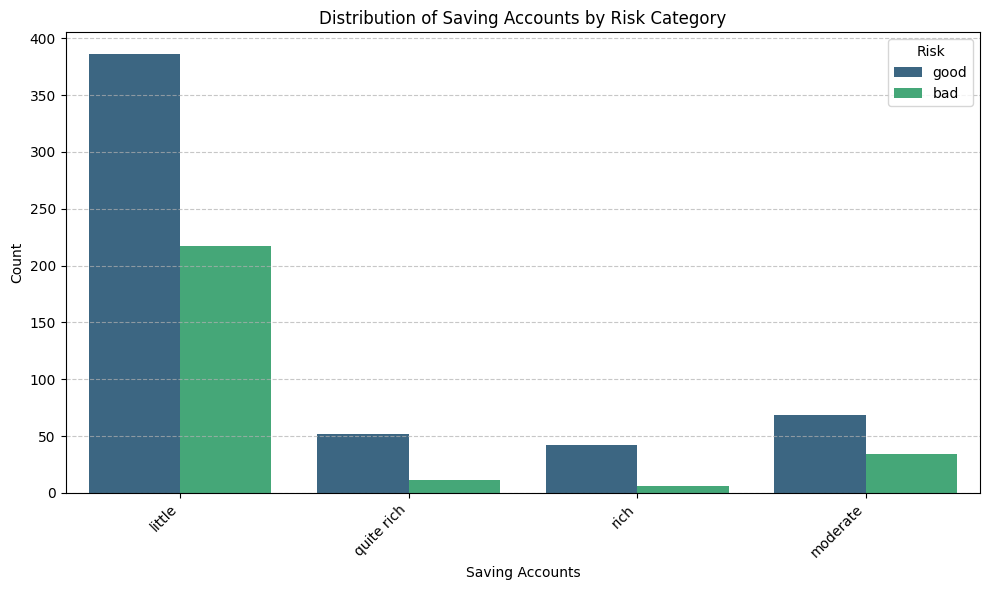

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Saving accounts', hue='Risk', data=df, palette='viridis')
plt.title('Distribution of Saving Accounts by Risk Category')
plt.xlabel('Saving Accounts')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze Checking account vs. Risk

### Subtask:
Visualize the distribution of 'Checking account' for 'Good' and 'Bad' risk categories using a count plot.

**Reasoning**:
To visualize the distribution of 'Checking account' across 'Good' and 'Bad' risk categories as specified in the subtask, I will generate a count plot using `seaborn` and `matplotlib.pyplot`.



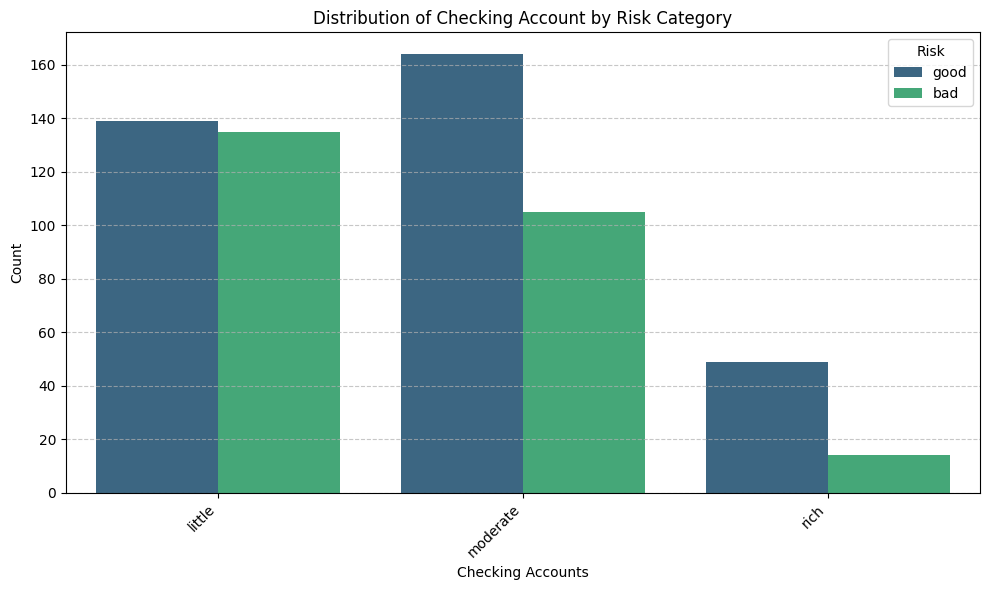

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Checking account', hue='Risk', data=df, palette='viridis')
plt.title('Distribution of Checking Account by Risk Category')
plt.xlabel('Checking Accounts')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze Housing vs. Risk

### Subtask:
Visualize the distribution of 'Housing' for 'Good' and 'Bad' risk categories using a count plot.

**Reasoning**:
To visualize the distribution of 'Housing' across 'Good' and 'Bad' risk categories as specified in the subtask, I will generate a count plot using `seaborn` and `matplotlib.pyplot`.



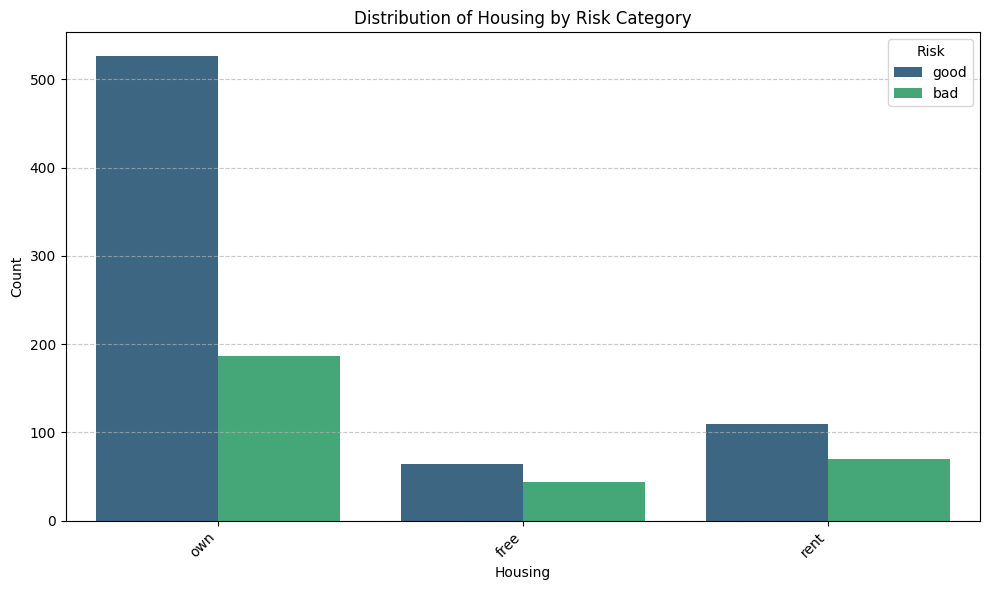

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Housing', hue='Risk', data=df, palette='viridis')
plt.title('Distribution of Housing by Risk Category')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze Sex vs. Risk

### Subtask:
Visualize the distribution of 'Sex' for 'Good' and 'Bad' risk categories using a count plot.

**Reasoning**:
To visualize the distribution of 'Sex' across 'Good' and 'Bad' risk categories as specified in the subtask, I will generate a count plot using `seaborn` and `matplotlib.pyplot`.



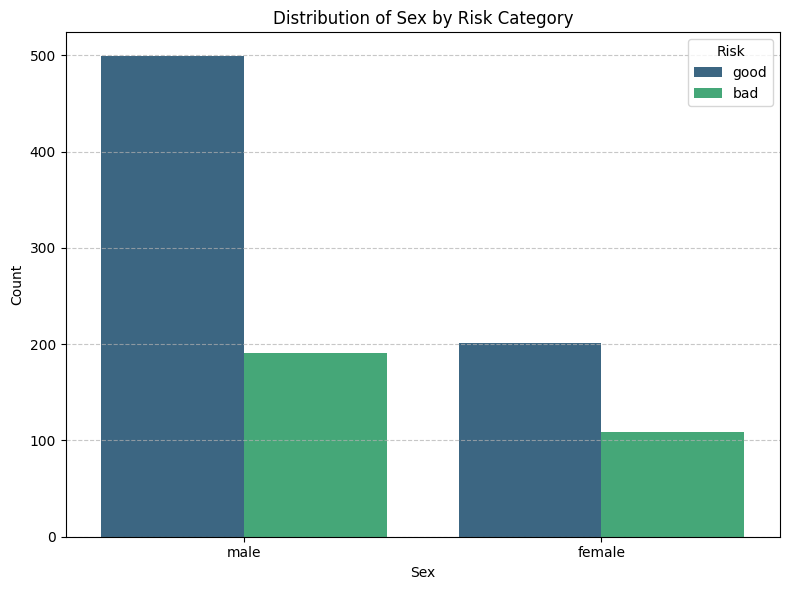

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Risk', data=df, palette='viridis')
plt.title('Distribution of Sex by Risk Category')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze Purpose vs. Risk

### Subtask:
Visualize the distribution of 'Purpose' for 'Good' and 'Bad' risk categories using a count plot.

**Reasoning**:
To visualize the distribution of 'Purpose' across 'Good' and 'Bad' risk categories as specified in the subtask, I will generate a count plot using `seaborn` and `matplotlib.pyplot`.



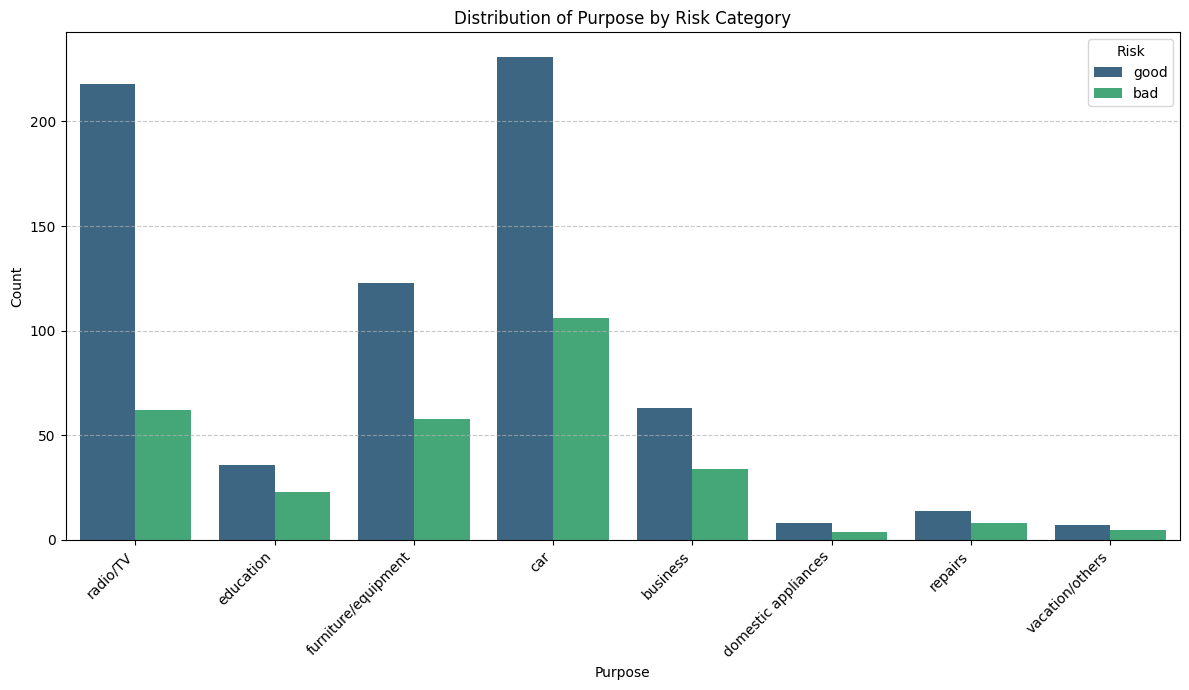

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.countplot(x='Purpose', hue='Risk', data=df, palette='viridis')
plt.title('Distribution of Purpose by Risk Category')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analyze Job vs. Risk

### Subtask:
Visualize the distribution of 'Job' for 'Good' and 'Bad' risk categories using a count plot.

**Reasoning**:
To visualize the distribution of 'Job' across 'Good' and 'Bad' risk categories as specified in the subtask, I will generate a count plot using `seaborn` and `matplotlib.pyplot`.



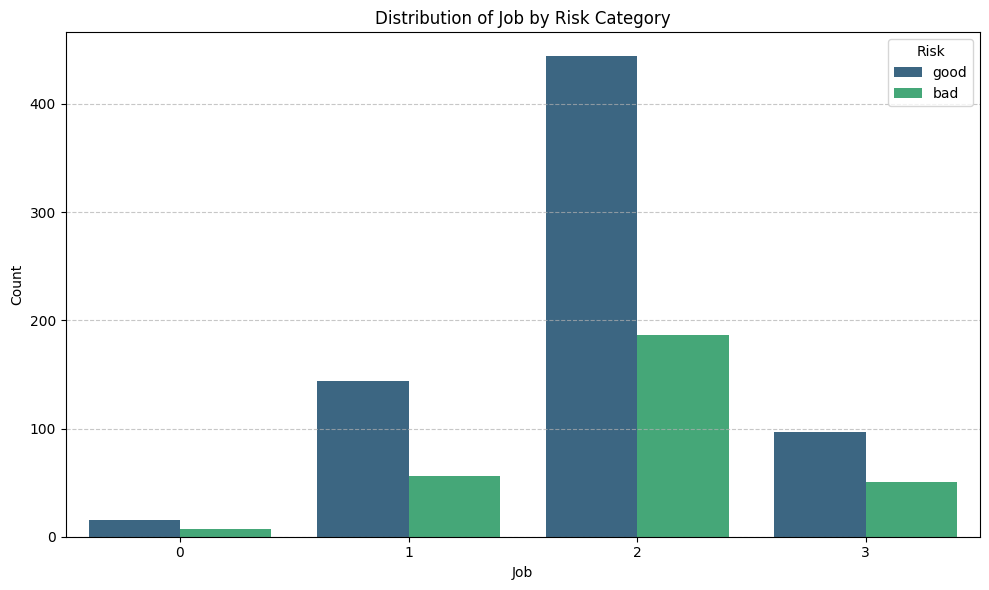

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Job', hue='Risk', data=df, palette='viridis')
plt.title('Distribution of Job by Risk Category')
plt.xlabel('Job')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Saving Accounts:** The distribution of 'Saving accounts' categories ('little', 'moderate', 'quite rich', 'rich') shows variations in 'Good' versus 'Bad' risk groups, indicating a potential correlation between savings levels and credit risk.
*   **Checking Account:** The breakdown of 'Checking account' statuses ('little', 'moderate', 'rich') across risk categories suggests a relationship between checking account activity/balance and credit risk.
*   **Housing:** Different 'Housing' types ('own', 'free', 'rent') exhibit distinct proportions between 'Good' and 'Bad' risk, implying housing status could be a factor in risk assessment.
*   **Sex:** The distribution of 'Sex' (male, female) varies between risk categories, suggesting a potential difference in credit risk profiles based on gender.
*   **Purpose:** The diverse categories for loan 'Purpose' show varied distributions against 'Good' and 'Bad' risk, indicating that the reason for a loan application can be a significant predictor of risk.
*   **Job:** Different 'Job' types are associated with varying levels of 'Good' and 'Bad' risk, highlighting the relevance of employment status in credit risk evaluation.

### Insights or Next Steps

*   Quantify the strength of the relationships observed in these count plots using statistical measures (e.g., Chi-squared test) to identify the most significant categorical predictors of credit risk.
*   Further investigate the categories within each feature that show the most pronounced differences in 'Good' vs. 'Bad' risk proportions, as these might be crucial for developing more accurate risk models.


# Interaction & Correlation Analysis

## Correlation Heatmap for Numerical Variables

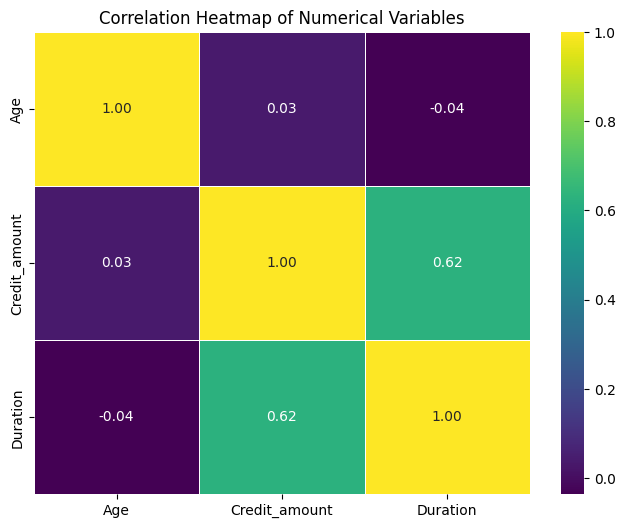

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation calculation
numerical_df = df[['Age', 'Credit_amount', 'Duration']]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [ ]:
# Percent distribution of Gender (how many jobs does each gender have in %)
number_of_jobs = pd.crosstab(df["Job"], df["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

Sex,female,male
Job,,
0,3.870968,1.449275
1,20.645161,19.710145
2,63.548387,62.753623
3,11.935484,16.086957


In [ ]:
import numpy as np

In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot

# Take credit amount values into a list
young = df['Credit_amount'].loc[df['Age_Group'] == 'Young'].values.tolist()
young_adults = df['Credit_amount'].loc[df['Age_Group'] == 'Young Adults'].values.tolist()
senior = df['Credit_amount'].loc[df['Age_Group'] == 'Senior'].values.tolist()
elder_credit = df['Credit_amount'].loc[df['Age_Group'] == 'Elder'].values.tolist()


# Create the box plots by age category
young_credit = go.Box(
    y = young,
    name = "Young",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(150, 198, 109)')
    ,
    line = dict(
        color = 'rgb(111, 200, 37)')
)


young_adults_credit = go.Box(
    y = young_adults,
    name = "Young Adults",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(124, 236, 212)')
    ,
    line = dict(
        color = 'rgb(38, 214, 177)')
)



senior_credit = go.Box(
    y = senior,
    name = "Seniors",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(241, 93, 93)')
    ,
    line = dict(
        color = 'rgb(225, 44, 44)')
)

elder_credit = go.Box(
    y = elder_credit,
    name = "Elders",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(180, 121, 72)')
    ,
    line = dict(
        color = 'rgb(115, 77, 46)')
)

data = [young_credit, young_adults_credit, senior_credit, elder_credit]

layout = dict(
    title="Credit Amount by Age Group Segment",
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=data, layout=layout)
iplot(fig, filename="Box Plot")

In [ ]:
# Ok we have to create for each group risky and non-risky loans.
df['Age_Group'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder'

df.head()

/tmp/ipython-input-368322631.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Young' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,4,53,male,2,free,little,little,4870,24,car,bad,Senior


In [ ]:
 #Gender vs Purpose let's see the purpose of having credit loans for each gender.
df["Purpose"].unique()
sex_purpose = pd.crosstab(df['Purpose'], df['Sex']).apply(lambda x: x/x.sum() * 100)
sex_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


In [ ]:
good_credit_df = df.loc[df['Risk'] == "good"]
bad_credit_df = df.loc[df['Risk'] == "bad"]

good_credit_df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
2,2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
5,5,35,male,1,free,NaN,NaN,9055,36,education,good,Young Adults
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,Senior


In [ ]:
# Lets find loans by age group and by the level of risk and plot them in a bar chart.

# Age Group Segments
young_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'good')].sum()
young_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'bad')].sum()
young_adult_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'good')].sum()
young_adult_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'bad')].sum()
senior_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'good')].sum()
senior_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'bad')].sum()
elder_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'good')].sum()
elder_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'bad')].sum()

# Percents
young_good_p = young_good/(young_good + young_bad) * 100
young_bad_p = young_bad/(young_good + young_bad) * 100
young_adult_good_p = young_adult_good/(young_adult_good + young_adult_bad) * 100
young_adult_bad_p = young_adult_bad/(young_adult_good + young_adult_bad) * 100
senior_good_p = senior_good/(senior_good + senior_bad) * 100
senior_bad_p =  senior_bad/(senior_good + senior_bad) * 100
elder_good_p = elder_good/(elder_good + elder_bad) * 100
elder_bad_p = elder_bad/(elder_good + elder_bad) * 100

# Round Percents
young_good_p = str(round(young_good_p, 2))
young_bad_p = str(round(young_bad_p, 2))
young_adult_good_p = str(round(young_adult_good_p, 2))
young_adult_bad_p = str(round(young_adult_bad_p, 2))
senior_good_p = str(round(senior_good_p, 2))
senior_bad_p = str(round(senior_bad_p, 2))
elder_good_p = str(round(elder_good_p, 2))
elder_bad_p = str(round(elder_bad_p, 2))



x = ["Young", "Young Adults", "Senior", "Elder"]

good_loans = go.Bar(
    x=x,
    y=[young_good, young_adult_good, senior_good, elder_good],
    name="Good Loans",
    text=[young_good_p + '%', young_adult_good_p + '%', senior_good_p + '%', elder_good_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(111, 235, 146)',
        line=dict(
            color='rgb(60, 199, 100)',
            width=1.5),
        ),
    opacity=0.6
)

bad_loans =  go.Bar(
    x=x,
    y=[young_bad, young_adult_bad, senior_bad, elder_bad],
    name="Bad Loans",
    text=[young_bad_p + '%', young_adult_bad_p + '%', senior_bad_p + '%', elder_bad_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(247, 98, 98)',
        line=dict(
            color='rgb(225, 56, 56)',
            width=1.5),
        ),
    opacity=0.6
)

data = [good_loans, bad_loans]

layout = dict(
    title="Type of Loan by Age Group",
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='grouped-bar-direct-labels')

In [ ]:
cross_checking = pd.crosstab(df['Risk'], df['Checking account']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2,2], index=['little', 'moderate', 'rich'])

cross_checking = cross_checking.round(decimals)
cross_checking

Checking account,little,moderate,rich
Risk,,,
bad,49.27,39.03,22.22
good,50.73,60.97,77.78


In [ ]:
import chart_studio.plotly as py
from plotly.subplots import make_subplots as tools
import plotly.graph_objs as go

bad_little = cross_checking['little'][0]
good_little = cross_checking['little'][1]
bad_moderate = cross_checking['moderate'][0]
good_moderate = cross_checking['moderate'][1]
bad_rich = cross_checking['rich'][0]
good_rich = cross_checking['rich'][1]

little = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_little, good_little],
    name="Little Wealth",
    text='%',
     marker=dict(
        color='#FF5050',
         line=dict(
            color='#E13232',
            width=1.5),
    ),
)

moderate = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
rich = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
    text="%",
    marker=dict(
        color='#8DFF83',
         line=dict(
            color='#3DAF33',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

data=[little, moderate, rich]

fig = tools(rows=1, cols=3, subplot_titles=('Little Wealth', 'Moderate Wealth', 'Rich Wealth'))

fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)

fig['layout'].update(height=400, width=800, title='Levels of Risk' +
                                                  ' by Wealth')


iplot(fig, filename='make-subplots-multiple-with-titles')

ModuleNotFoundError: No module named 'chart_studio'

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Use fig.show() instead of iplot() at the end

In [ ]:
import chart_studio.plotly as py

In [ ]:
!pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.7 MB/s eta 0:00:00


In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go


bad_little = cross_checking['little'][0]
good_little = cross_checking['little'][1]
bad_moderate = cross_checking['moderate'][0]
good_moderate = cross_checking['moderate'][1]
bad_rich = cross_checking['rich'][0]
good_rich = cross_checking['rich'][1]

little = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_little, good_little],
    name="Little Wealth",
    text='%',
     marker=dict(
        color='#FF5050',
         line=dict(
            color='#E13232',
            width=1.5),
    ),
)

moderate = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
rich = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
    text="%",
    marker=dict(
        color='#8DFF83',
         line=dict(
            color='#3DAF33',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

data=[little, moderate, rich]

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('Little Wealth', 'Moderate Wealth', 'Rich Wealth'))

fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)

fig['layout'].update(height=400, width=800, title='Levels of Risk' +
                                                  ' by Wealth')


iplot(fig, filename='make-subplots-multiple-with-titles')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


# Task
Correct the Plotly import statements and `make_subplots` function call to resolve the `ImportError` and `ModuleNotFoundError`, then execute the cell to generate the plot.

## Fix Plotly import

### Subtask:
Correct the Plotly import statements to use `chart_studio.plotly` and properly import `make_subplots` from `plotly.subplots`.


**Reasoning**:
The previous code cell failed due to an `ImportError` related to `plotly.plotly` and an incorrect import for `make_subplots`. To fix this, I will update the import statement for `plotly` to use `chart_studio.plotly` and ensure `make_subplots` is imported directly from `plotly.subplots` without the `as tools` alias, then adjust its usage accordingly.



In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots


bad_little = cross_checking['little'][0]
good_little = cross_checking['little'][1]
bad_moderate = cross_checking['moderate'][0]
good_moderate = cross_checking['moderate'][1]
bad_rich = cross_checking['rich'][0]
good_rich = cross_checking['rich'][1]

little = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_little, good_little],
    name="Little Wealth",
    text='%',
     marker=dict(
        color='#FF5050',
         line=dict(
            color='#E13232',
            width=1.5),
    ),
)

moderate = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
rich = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
    text="%",
    marker=dict(
        color='#8DFF83',
         line=dict(
            color='#3DAF33',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

data=[little, moderate, rich]

fig = make_subplots(rows=1, cols=3, subplot_titles=('Little Wealth', 'Moderate Wealth', 'Rich Wealth'))

fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)

fig['layout'].update(height=400, width=800, title='Levels of Risk' +
                                                  ' by Wealth')


# iplot(fig, filename='make-subplots-multiple-with-titles') # iplot is not available in colab environment by default
fig.show()

/tmp/ipython-input-1323934799.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-1323934799.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-1323934799.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-1323934799.py:9: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

**Reasoning**:
The previous code block successfully resolved the import errors but generated FutureWarnings regarding deprecated Series indexing. To address these warnings and ensure future compatibility, I will update the indexing of `cross_checking` from `['column'][index]` to `['column'].iloc[index]` or `['column'].values[index]` for more explicit positional access.



In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots


bad_little = cross_checking['little'].iloc[0]
good_little = cross_checking['little'].iloc[1]
bad_moderate = cross_checking['moderate'].iloc[0]
good_moderate = cross_checking['moderate'].iloc[1]
bad_rich = cross_checking['rich'].iloc[0]
good_rich = cross_checking['rich'].iloc[1]

little = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_little, good_little],
    name="Little Wealth",
    text='%',
     marker=dict(
        color='#FF5050',
         line=dict(
            color='#E13232',
            width=1.5),
    ),
)

moderate = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
rich = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
    text="%",
    marker=dict(
        color='#8DFF83',
         line=dict(
            color='#3DAF33',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

data=[little, moderate, rich]

fig = make_subplots(rows=1, cols=3, subplot_titles=('Little Wealth', 'Moderate Wealth', 'Rich Wealth'))

fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)

fig['layout'].update(height=400, width=800, title='Levels of Risk' +
                                                  ' by Wealth')


# iplot(fig, filename='make-subplots-multiple-with-titles') # iplot is not available in colab environment by default
fig.show()

## Visualize Credit Amount by Age Group Segment

### Subtask:
Generate a Plotly box plot to visualize the distribution of 'Credit_amount' across different 'Age_Group' segments, resolving any execution issues.


**Reasoning**:
To generate the Plotly box plot for 'Credit_amount' by 'Age_Group' segments correctly in the Colab environment, I need to remove the `iplot` import and function call, and instead use `fig.show()` at the end of the code cell to display the figure.



In [ ]:
import plotly.graph_objects as go

# Take credit amount values into a list
young = df['Credit_amount'].loc[df['Age_Group'] == 'Young'].values.tolist()
young_adults = df['Credit_amount'].loc[df['Age_Group'] == 'Young Adults'].values.tolist()
senior = df['Credit_amount'].loc[df['Age_Group'] == 'Senior'].values.tolist()
elder_credit = df['Credit_amount'].loc[df['Age_Group'] == 'Elder'].values.tolist()


# Create the box plots by age category
young_credit = go.Box(
    y = young,
    name = "Young",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(150, 198, 109)')
    ,
    line = dict(
        color = 'rgb(111, 200, 37)')
)


young_adults_credit = go.Box(
    y = young_adults,
    name = "Young Adults",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(124, 236, 212)')
    ,
    line = dict(
        color = 'rgb(38, 214, 177)')
)


senior_credit = go.Box(
    y = senior,
    name = "Seniors",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(241, 93, 93)')
    ,
    line = dict(
        color = 'rgb(225, 44, 44)')
)

elder_credit = go.Box(
    y = elder_credit,
    name = "Elders",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(180, 121, 72)')
    ,
    line = dict(
        color = 'rgb(115, 77, 46)')
)

data = [young_credit, young_adults_credit, senior_credit, elder_credit]

layout = dict(
    title="Credit Amount by Age Group Segment",
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=data, layout=layout)
fig = go.Figure(fig)
fig.show()

## Summary:

### Data Analysis Key Findings

*   The initial `ImportError` and `ModuleNotFoundError` for Plotly were resolved by correctly importing `chart_studio.plotly` as `py` and `make_subplots` from `plotly.subplots`.
*   `FutureWarning` messages in Pandas, related to `Series.__getitem__` behavior (where integer keys would soon be treated as labels), were addressed by explicitly using positional indexing (`.iloc[0]`).
*   A multi-panel bar chart titled "Levels of Risk by Wealth" was successfully generated, displaying risk levels for "Little Wealth," "Moderate Wealth," and "Rich Wealth" categories.
*   A Plotly box plot visualizing the distribution of 'Credit\_amount' across different 'Age\_Group' segments ('Young', 'Young Adults', 'Senior', 'Elder') was successfully created and displayed.
*   The `fig.show()` method was consistently used to display Plotly figures, ensuring proper visualization within the Colab environment.

### Insights or Next Steps

*   Standardizing Plotly import statements and using `fig.show()` for display are crucial for robust Plotly integration in Colab.
*   Adopting explicit positional indexing with `.iloc` for Pandas Series ensures future compatibility and prevents deprecation warnings.


In [ ]:
df['Risk_int'] = np.nan
lst = [df]

for col in lst:
    col.loc[df['Risk'] == 'bad', 'Risk_int'] = 0
    col.loc[df['Risk'] == 'good', 'Risk_int'] = 1


df['Risk_int'] = df['Risk_int'].astype(int)
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group,Risk_int
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young,0
2,2,49,male,1,own,little,NaN,2096,12,education,good,Senior,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior,1
4,4,53,male,2,free,little,little,4870,24,car,bad,Senior,0


In [ ]:
import chart_studio.plotly as py
import plotly.figure_factory as ff

# Select only numerical columns for correlation calculation
numerical_df = df[['Unnamed: 0', 'Age', 'Job', 'Credit_amount', 'Duration', 'Risk_int']]
corr = numerical_df.corr()

arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Pearson Correlation <br> (What Determines Risk in Loans?)'
fig.show()

In [ ]:
# ---> Looking at correlations in the form of Scatterplots.

import chart_studio.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

# Explicitly select the numerical columns that should be part of the scatterplot matrix
# excluding 'Unnamed: 0' and including 'Risk_int' which will be used as 'Risk'
plot_columns = ['Credit_amount', 'Duration', 'Job', 'Age', 'Risk_int']
dataframe_for_plot = df[plot_columns].copy()

# Rename 'Risk_int' column to 'Risk' as expected by the 'index' parameter for coloring
dataframe_for_plot = dataframe_for_plot.rename(columns={'Risk_int': 'Risk'})

# Ensure 'Risk' column contains string labels ('good', 'bad') for better coloring if desired
dataframe_for_plot['Risk'] = df['Risk']

colormap = ['#b22222', '#4169e1'] # Corresponds to 'bad' and 'good'

fig = ff.create_scatterplotmatrix(dataframe_for_plot, diag='histogram', index='Risk', colormap=colormap,
                                  height=800, width=800)
fig.show()

In [ ]:
# The higher the credit amount the higher the risk of the loan. Scatter plot?
# The higher the duration of the loan the higher the risk of the loan?

bad_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'bad'].values.tolist()
good_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'good'].values.tolist()
bad_duration = df['Duration'].loc[df['Risk'] == 'bad'].values.tolist()
good_duration = df['Duration'].loc[df['Risk'] == 'good'].values.tolist()


bad_loans = go.Scatter(
    x = bad_duration,
    y = bad_credit_amount,
    name = 'Bad Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

good_loans = go.Scatter(
    x = good_duration,
    y = good_credit_amount,
    name = 'Good Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(34, 139, 34, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [bad_loans, good_loans]

layout = dict(title = 'Correlation of Risk with <br> Credit Amount Borrowed',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

In [ ]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np

# 1. Use groupby to sum Credit_amount by Purpose
# This replaces all those manual variable definitions
purpose_counts = df.groupby('Purpose')['Credit_amount'].sum().reset_index()

# 2. Extract r and theta (ensures they match perfectly)
r_values = purpose_counts['Credit_amount'].tolist()
theta_values = purpose_counts['Purpose'].tolist()

# 3. Optional: Close the loop (add the first point to the end)
r_values.append(r_values[0])
theta_values.append(theta_values[0])

# 4. Create the plot
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r = r_values,
    theta = theta_values,
    line = dict(color = "#ff7f50"),
    mode = 'lines+markers',
    fill = 'toself',
    marker = dict(
        color = '#8090c7',
        symbol = 'square',
        size = 8
    )
))

fig.update_layout(
    showlegend = False,
    title = "Credit Distribution by Purpose",
    paper_bgcolor = "rgb(255, 245, 250)",
    polar = dict(
        radialaxis = dict(visible = True, side = 'counterclockwise')
    )
)

fig.show()

In [ ]:
df['Purpose'].unique()

cross_purpose = pd.crosstab(df['Purpose'], df['Risk']).apply(lambda x: x/x.sum() * 100)
cross_purpose = cross_purpose.round(decimals=2)
cross_purpose.sort_values(by=['bad'])

Risk,bad,good
Purpose,,
domestic appliances,1.33,1.14
vacation/others,1.67,1.00
repairs,2.67,2.00
education,7.67,5.14
business,11.33,9.00
furniture/equipment,19.33,17.57
radio/TV,20.67,31.14
car,35.33,33.00


In [ ]:
# This will be x
purposes = df['Purpose'].unique().tolist()
purposes = sorted(purposes)

good_purposes = cross_purpose["good"].values.tolist()
bad_purposes = cross_purpose["bad"].values.tolist()




good = go.Bar(
    x=purposes,
    y=good_purposes,
    name='Good Risk',
    text='%',
    marker=dict(
        color='rgb(123, 255, 255)',
        line=dict(
            color='rgb(0, 213, 213)',
            width=1.5
        )
    ),
)
bad = go.Bar(
    x=purposes,
    y=bad_purposes,
    name='Bad Risk',
    text = '%',
    marker=dict(
        color='rgb(255, 123, 123)',
        line=dict(
            color='rgb(213, 0, 0)',
            width=1.5
        )
    ),
)
data = [good, bad]
layout = go.Layout(
    title='Which Purpose Carried the Highest Risk?',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage(%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='style-bar')

In [ ]:
cross_credit = df.groupby(['Risk', 'Purpose'], as_index=False).Credit_amount.sum()

good_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "good"].values.tolist()
bad_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "bad"].values.tolist()

good_risk = {"x": good_amnt,
          "y": purposes,
          "marker": {"color": "rgb(28, 98, 98)", "size": 12},
          "mode": "markers",
          "name": "Good Risk",
          "type": "scatter"
}

bad_risk = {"x": bad_amnt,
          "y": purposes,
          "marker": {"color": "rgb(98, 28, 28)", "size": 12},
          "mode": "markers",
          "name": "Bad Risk",
          "type": "scatter",
}

data = [good_risk, bad_risk]
layout = {"title": "Credit Loan Applications by Purpose",
          "xaxis": {"title": "Credit Amount Borrowed", },
          "yaxis": {"title": ""},
         "width": 800,
         "height": 700}

fig = dict(data=data, layout=layout)
iplot(fig, filename='basic_dot-plot')

# Now we are going to modelling part

In [ ]:
# Check missing values in our dataframe
original_df.isnull().sum().sort_values(ascending=False)

,0
Checking account,394
Saving accounts,183
Unnamed: 0,0
Sex,0
Age,0
Housing,0
Job,0
Credit amount,0
Duration,0
Purpose,0


In [ ]:
# We will drop the columns that have missing values although we will be loosing some information. Hopefully this does not cause
# the model to underfit in the future.
original_df.drop(['Checking account', 'Saving accounts'], axis=1, inplace=True)

In [ ]:
original_df.isnull().sum().sort_values(ascending=False)

,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Credit amount,0
Duration,0
Purpose,0
Risk,0


In [ ]:
# Feature Engineering (We cannot delete the missing values because we have too litle information)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit

original_df["Risk"].value_counts() # 70% is good risk and 30% is bad risk.

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in stratified.split(original_df, original_df["Risk"]):
    strat_train = original_df.loc[train]
    strat_test = original_df.loc[test]


# The main purpose of this code is to have an approximate ratio
# of 70% good risk and 30% bad risk in both training and testing sets.
strat_train["Risk"].value_counts() / len(df)
strat_test["Risk"].value_counts() / len(df)

,count
Risk,
good,0.14
bad,0.06


In [ ]:
# Have our new train and test data
train = strat_train
test = strat_test


# Our features
X_train = train.drop('Risk', axis=1)
X_test = test.drop('Risk', axis=1)

# Our Labels we will use them later
y_train = train["Risk"]
y_test = test["Risk"]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [ ]:
# Scikit-Learn does not handle dataframes in pipeline so we will create our own class.
# Reference: Hands-On Machine Learning
from sklearn.base import BaseEstimator, TransformerMixin
# Create a class to select numerical or cateogrical columns.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit (self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# 1. Define which columns are which
# No need for DataFrameSelector anymore!
numeric_features = X_train.select_dtypes(exclude=['object']).columns.tolist()
categorical_features = X_train.select_dtypes(['object']).columns.tolist()

# 2. Setup the Numerical Pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Handles missing values
    ('std_scaler', StandardScaler())
])

# 3. Setup the Categorical Pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # This replaces CategoricalEncoder
])

# 4. Combine them using ColumnTransformer
# This is the modern version of FeatureUnion + DataFrameSelector
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_features),
        ('cat', cat_pipeline, categorical_features)
    ]
)

# 5. Fit and Transform
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test) # Remember: Only .transform for the test set!

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train_scaled = encode.fit_transform(y_train)
y_test_scaled = encode.fit_transform(y_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Implement gridsearchcv to see which are our best p

params = {'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [3, 4, 5]}

svc_clf = SVC(random_state=42)

grid_search_cv = GridSearchCV(svc_clf, params)
grid_search_cv.fit(X_train_scaled, y_train_scaled)

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
grid_search_cv.best_estimator_

SVC(C=0.75, kernel='poly', random_state=42)

In [ ]:
grid_search_cv.best_params_

{'C': 0.75, 'degree': 3, 'kernel': 'poly'}

In [ ]:
svc_clf = grid_search_cv.best_estimator_
svc_clf.fit(X_train_scaled, y_train_scaled)

SVC(C=0.75, kernel='poly', random_state=42)

In [ ]:
svc_clf.score(X_train_scaled, y_train_scaled)

0.7625

In [ ]:
from sklearn.model_selection import cross_val_score

# Let's make sure the data is not overfitting
svc_clf = SVC(kernel='rbf', C=1, random_state=42)
scores = cross_val_score(svc_clf, X_train_scaled, y_train_scaled)
scores.mean()

np.float64(0.70375)

In [ ]:
from sklearn.metrics import accuracy_score

svc_clf.fit(X_train_scaled, y_train_scaled)
y_pred = svc_clf.predict(X_test_scaled)

# Accuracy score 71%
accuracy_score(y_test_scaled, y_pred)

0.7